In [33]:
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np

In [136]:

# Download SPY data for the maximum period
spy = yf.download('SPY', period="max",interval='5d')
sq = yf.download('SQ', period="max",interval='5d')

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [138]:
sq

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-11-19,11.200000,14.780000,9.000000,13.070000,13.070000,47466100
2015-11-24,12.000000,12.230000,11.520000,12.020000,12.020000,4714700
2015-12-04,11.950000,12.040000,11.800000,12.040000,12.040000,1331600
2015-12-09,12.000000,12.240000,11.900000,11.990000,11.990000,1075700
2015-12-14,12.200000,12.400000,11.870000,12.330000,12.330000,2163700
...,...,...,...,...,...,...
2023-09-13,54.075001,54.580002,53.610001,54.150002,54.150002,5735300
2023-09-18,52.810001,52.810001,51.240002,51.250000,51.250000,11564000
2023-09-28,44.029999,44.560001,42.770000,44.349998,44.349998,16585100


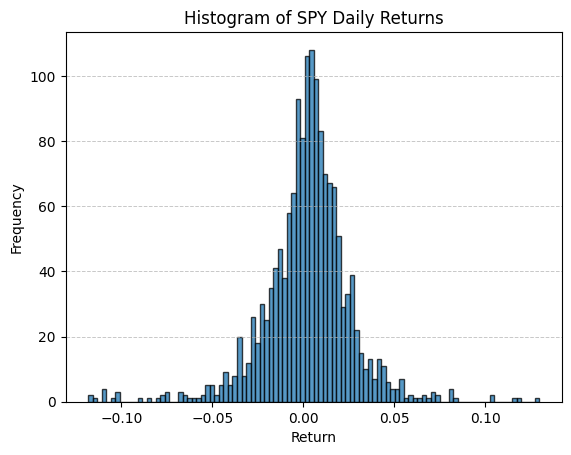

In [147]:



# Calculate the daily returns
spy['Weekly Returns'] = spy['Adj Close'].pct_change()


# Drop NaN values
spy = spy.dropna()


# Plot histogram
plt.hist(spy['Weekly Returns'], bins=100, alpha=0.75, edgecolor="black")
plt.title('Histogram of SPY Daily Returns')
plt.xlabel('Return')
plt.ylabel('Frequency')
plt.grid(True, axis='y', linestyle='--', linewidth=0.7, alpha=0.7)
plt.show()


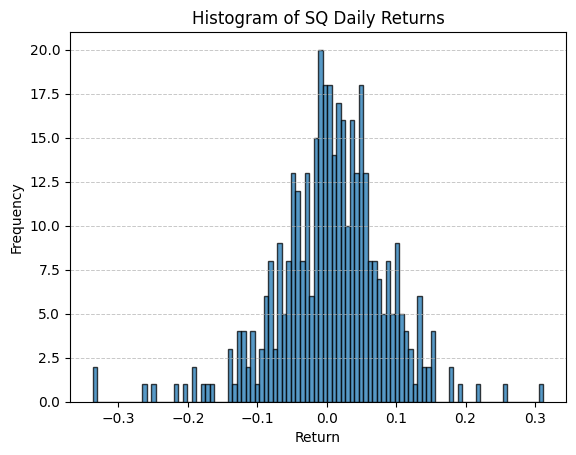

In [144]:
sq['Weekly Returns'] = sq['Adj Close'].pct_change()
sq = sq.dropna()

plt.hist(sq['Weekly Returns'], bins=100, alpha=0.75, edgecolor="black")
plt.title('Histogram of SQ Daily Returns')
plt.xlabel('Return')
plt.ylabel('Frequency')
plt.grid(True, axis='y', linestyle='--', linewidth=0.7, alpha=0.7)
plt.show()

In [148]:
cov_matrix = spy['Weekly Returns'].cov(sq['Weekly Returns'])
beta = cov_matrix / spy['Weekly Returns'].var()
print(beta)


nan


/var/folders/sb/j3m42l4j36x49gq6998z6jp00000gn/T/ipykernel_1363/3760316137.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sq['Cumulative Returns'] = (1 + sq['Daily Returns']).cumprod()


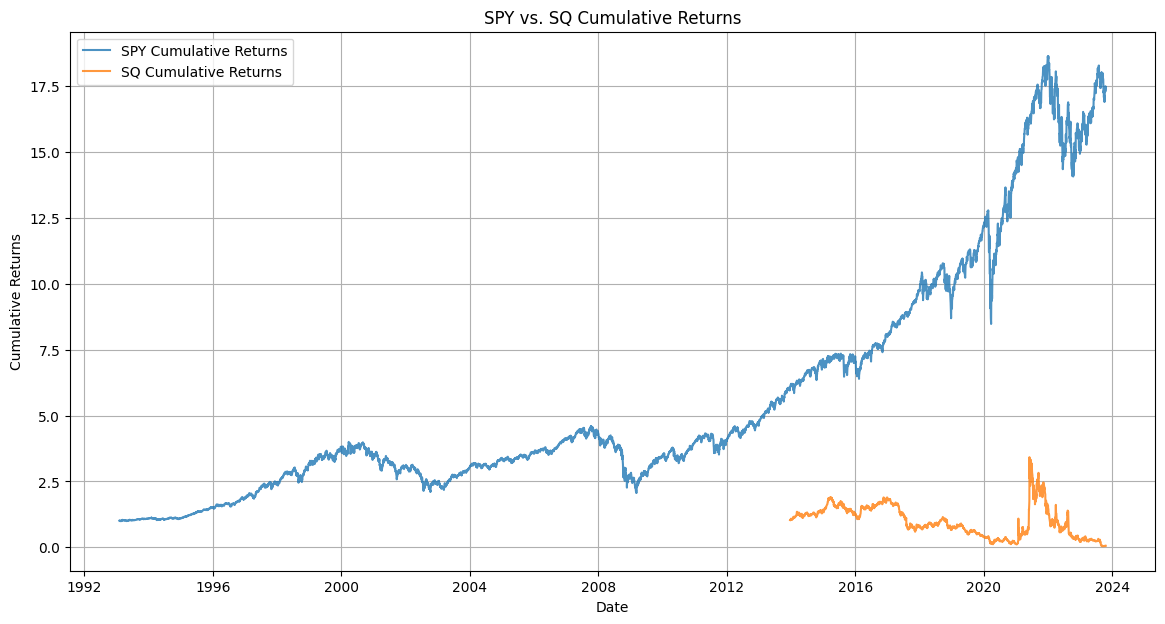

In [114]:
spy['Cumulative Returns'] = (1 + spy['Daily Returns']).cumprod()
sq['Cumulative Returns'] = (1 + sq['Daily Returns']).cumprod()

plt.figure(figsize=(14, 7))
plt.plot(spy['Cumulative Returns'], label='SPY Cumulative Returns', alpha=0.8)
plt.plot(sq['Cumulative Returns'], label='SQ Cumulative Returns', alpha=0.8)
plt.title('SPY vs. SQ Cumulative Returns')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.grid(True)
plt.show()

